# **New Jersey Institute of Technology**
# DS 675: Machine Learning, Spring 2023
 
*   Instructor: Dr. Przemyslaw Musialski
*   TA: Haotian Yin
 
# **Assignment 6**
* Date: 4/18/2023
* **Due: 5/2/2023, 11:59pm EST**
* Total possible points: 25 + 5 bonus points
 
 
## Instructions
*   Copy it locally or edit it as a copy in your Google-Colab (File-->Save a Copy in Drive). 
*   Look for notebook cells starting with **"Task #"**. **Edit only in the indicated areas!** Do not forget to write brief documentation for each task in the dedicated cell areas. **Do not edit in other areas!**
*   Delivery Method: Upload a Jupyter notebook following the suggested name convention. 
*   Note: you can access the file only with your NJIT-Google-Account.  **Private accounts will not have access**. 
*   Submit your solution on CANVAS. Late submissions are penalized with 10% of total points per day. 
 
 
## Academic Policy
A set of ethical principles governing this course:
*   It is okay to share information and knowledge with your 
colleagues, but
*   **It is not okay** to share the code,
*   **It is not okay** to post or give out your code to others (also in the future!),
*   **It is not okay** to use code from others (also from the past) for this Assignment!
 
**Any noticed disregard of these principles will be sanctioned** as per the Academic Integrity Policy of NJIT (http://www5.njit.edu/policies/sites/policies/files/academic-integrity-code.pdf).
 
 
## Late Policy
Late submissions are penalized with 10% of total points per day.

## **Remarks and Resources**
**I highly recommend to study the DeepLizzard Pytorch Programming Course** for:
https://deeplizard.com/learn/video/v5cngxo4mIg

---



# Instructions and Remarks
In this Assigment we want to expetiment with a CNN for classification. The goal is to modify the CNN presented last week ([see our CNN Example Code](https://drive.google.com/file/d/17HGUD38gsrh_keF6X966itYu_befMpTh/view?usp=sharing)). 
The CNN in the example was fairly accurte for the MNIST dataset. However, it has a rather poor performance on the [FashionMNIST](https://arxiv.org/abs/1708.07747) dataset. See the Paper for details on FashionMNIST https://arxiv.org/abs/1708.07747

## Goal
The goal is to modifiy the network to reach at least 90% accuracy on the FashionMNIST dataset. 

## Tasks
Todo so, adjust the following settings of the given CNN: 
1.   **Kernel size** of the convolutional layers (4 points)
2.   **Number of channels** between the convolutional layers  (4 points)
3.   **Number of features** in the fully connected layers  (3 points)
4.   The **learning rate** of the training  (3 points)
5.   The **batch size** of the training  (3 points)
6.   Compare the **running time** of the training process on the GPU (`use_gpu=True`) and on the CPU (`use_gpu=False`) and report the **speedup** by in your documentation (3 points)
7.   Compare the **accuracy** of your network on the original MNIST dataset and draw conclusions in your documentation (3 points)
8.   Document your work  (2 points)

## Remarks
*   **Note 1: you should not change the number of epochs!** We want to achieve an accuracy of >90% with 5 epochs!
*   **Note 2: you should not change the number of layers!** For the standard task you should get >90% with the given number of layers just by changing the setting mentioned above. 
*   **Note 3: document your work in the text cell below!** You should describe the way how did you come up with your solution. Your desciption should be at least 5 sentences. **If you do not document, points will be derducted!**

## Bonus
* There is no need to change the number of layers to reach 90%. 
* However, if you want to change the number of layers and you can achieve **more then 95% accuracy, you will get 5 bonus points on top.** 

## Instructions
Search for TODO_A6 to find spots in the code you should work. 



---
# Documentation (Task 8)
As part of this task I changed the Kernal Size, Number of Channels , Number of features, learning rate and batch size. Without adding the new layers I am getting an accuracy of 91.4% with the below network :- 

1. self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=2)
2. self.conv2 = nn.Conv2d(in_channels=6, out_channels=40, kernel_size=2)

3. self.fc1 = nn.Linear(in_features=1440, out_features = 1000)
4. self.fc2 = nn.Linear(in_features= 1000, out_features= 500)
5. self.out = nn.Linear(in_features= 500, out_features=10)

with the batch size as 10 and learning rate as 10. 

As part of **Task 6** I obseerved percent increase in time when I use use_gpu = False of about 57% as compared to use_gpu = True. I got this result in my personal laptop.

As part of **Task 7** for MNIST dataset I ma getting an accuracy of 99.2% as compared to 91.4% for Fashion MNIST dataset without adding new layers and using the parameters above.

As part of **Bonus task** I added one fc layer and removed the max pool layer for the 2nd cnn layer.

---
# CNN for FashionMNIST Image Classification




Examples based on the DeepLizard Tutorial: http://deeplizard.com/learn/video/v5cngxo4mIg

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Section 1: Data and Data Processing

Importance of Data in Deep Learning - http://deeplizard.com/learn/video/EqpzfvxBx30  
Extract, Transform, Load (ETL) - http://deeplizard.com/learn/video/8n-TGaBZnk4  
PyTorch Datasets and DataLoaders - http://deeplizard.com/learn/video/mUueSPmcOBc  

In [ ]:
# TODO_A6: adapt the learning_rate (Task 4)
learning_rate = 0.1

# TODO_A6: adapt the batch_size (Task 5)
batch_size = 10

# TODO_A6: check performance without use_gpu (Task 6)
use_gpu = True

# do not change the number of epochs!
num_epochs = 5

In [ ]:
# TODO_A6: check the accuracy of your network on MNIST (just comment/uncomment the lines) (Task 7)

train_set = torchvision.datasets.FashionMNIST(
# train_set = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

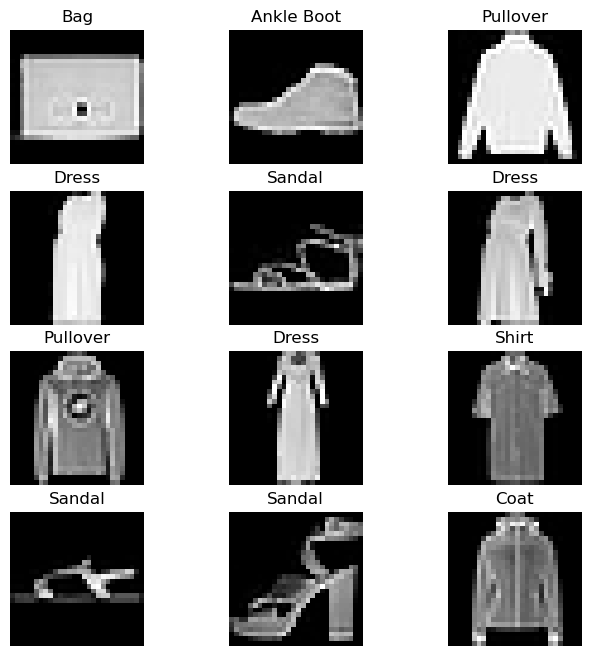

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 4

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([10, 1, 28, 28])
Labels batch shape: torch.Size([10])


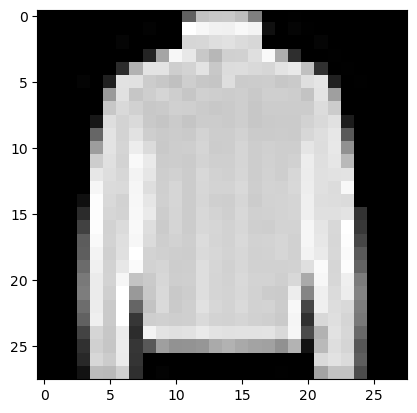

Label: 4


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Section 2: Neural Networks and PyTorch Design

Build PyTorch CNN - http://deeplizard.com/learn/video/k4jY9L8H89U  
CNN Layers - http://deeplizard.com/learn/video/IKOHHItzukk  
CNN Weights - http://deeplizard.com/learn/video/stWU37L91Yc  
Callable Neural Networks - http://deeplizard.com/learn/video/rcc86nXKwkw  
CNN Forward Method - http://deeplizard.com/learn/video/MasG7tZj-hw  

### Previous code to get the accuracy of 90% and above without adding new layers

1. self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=2)
2. self.conv2 = nn.Conv2d(in_channels=6, out_channels=40, kernel_size=2)

3. self.fc1 = nn.Linear(in_features=1440, out_features = 1000)
4. self.fc2 = nn.Linear(in_features= 1000, out_features= 500)
5. self.out = nn.Linear(in_features= 500, out_features=10)

In [ ]:
class Network_FashionMNIST(nn.Module):
    def __init__(self):
        super(Network_FashionMNIST, self).__init__()

        # TODO_A6: 
        # adapt the kernel sizes (Task 1)
        # adapt the number of channels (feautre maps) (Task 2)
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=55, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=55, out_channels=55, kernel_size=3)
 
        # TODO_A6:  
        # adapt the number of feautres (Task 3)
        self.fc1 = nn.Linear(in_features=6655, out_features = 5000)
        self.fc2 = nn.Linear(in_features= 5000, out_features= 4000)
        self.fc3 = nn.Linear(in_features= 4000, out_features= 1000)
        self.out = nn.Linear(in_features= 1000, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t       

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)        
        t = F.max_pool2d(t, kernel_size=2, stride=2)        
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)        
        #t = F.max_pool2d(t, kernel_size=2, stride=2)     
        
        # (4) hidden linear layer        
        t = t.view(t.size(0), -1)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (7) hidden linear layer - added
        t = self.fc3(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

    # this is a copy of forward used to print the size of the layers
    def print_forward(self, t):
        # (1) input layer
        t = t
        print("(1) input layer: ", t.size())
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)        
        print("(2) hidden conv layer: ", t.size())        
        
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print("(2) max pool filter: ", t.size())

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        print("(3) hidden conv layer: ", t.size())        
        
        #t = F.max_pool2d(t, kernel_size=2, stride=2)
        #print("(3) max pool filter: ", t.size())
        
        # (4) hidden linear layer
        t = t.view(t.size(0), -1)
        t = self.fc1(t)
        t = F.relu(t)
        print("(4) hidden linear layer: ", t.size())
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        print("(5) hidden linear layer: ", t.size())

        # (7) hidden linear layer - Added
        t = self.fc3(t)
        t = F.relu(t)
        print("(5) hidden linear layer: ", t.size())

        # (6) output layer
        t = self.out(t)
        print("(6) output layer: ", t.size())
        #t = F.softmax(t, dim=1)
        
        return t

# Section 3: Training Neural Networks

In [ ]:
# create instance of the network
network = Network_FashionMNIST()

# print network setup
print(network)

# run the print forward pass to see the sizes of layers
x = torch.randn(1, 1, 28, 28)
network.cpu().print_forward(x);

Network_FashionMNIST(
  (conv1): Conv2d(1, 55, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(55, 55, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=6655, out_features=5000, bias=True)
  (fc2): Linear(in_features=5000, out_features=4000, bias=True)
  (fc3): Linear(in_features=4000, out_features=1000, bias=True)
  (out): Linear(in_features=1000, out_features=10, bias=True)
)
(1) input layer:  torch.Size([1, 1, 28, 28])
(2) hidden conv layer:  torch.Size([1, 55, 26, 26])
(2) max pool filter:  torch.Size([1, 55, 13, 13])
(3) hidden conv layer:  torch.Size([1, 55, 11, 11])
(4) hidden linear layer:  torch.Size([1, 5000])
(5) hidden linear layer:  torch.Size([1, 4000])
(5) hidden linear layer:  torch.Size([1, 1000])
(6) output layer:  torch.Size([1, 10])


In [ ]:
# create optimizer, we use the SGD which we learned
optimizer = optim.SGD(network.parameters(), lr=learning_rate) # Optimizer

# creat a device, gpu if requested
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")
# print("used device:", device)

# move the network to the device
network = network.to(device)

# array to store the progress
epoch_loss = []

In [ ]:
# The training loop
for epoch in range(num_epochs):
    t = time.time()
    total_labels = 0  
    total_correct = 0    
    total_loss = 0        
    epoch_loss.append(0)

    for batch in train_loader:
        # get the samples images and their labels for the batk
        images, labels = batch

        # move to selected device (gpu or cpu)
        images = images.to(device)
        labels = labels.to(device)

        # class predictions
        preds = network(images)
        
        # cross-entropy loss
        loss = F.cross_entropy(preds, labels)
        
        # clear gradient
        optimizer.zero_grad()
        # backpropagation
        loss.backward()

        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()
        
        # track loss and predicion accuracy
        epoch_loss[-1] += loss.item()
        total_loss += loss.item()
        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
        total_labels += len(labels)

    print('Epoch [%d / %d] loss: %f, accuracy: %f, time: %3.3f' 
          % (epoch+1, num_epochs, total_loss, total_correct/total_labels, np.round_(time.time() - t, 3)))    

Epoch [1 / 5] loss: 2993.954604, accuracy: 0.812633, time: 115.584
Epoch [2 / 5] loss: 1757.137845, accuracy: 0.892283, time: 107.941
Epoch [3 / 5] loss: 1409.980496, accuracy: 0.911883, time: 92.779
Epoch [4 / 5] loss: 1164.056896, accuracy: 0.926317, time: 97.788
Epoch [5 / 5] loss: 962.349946, accuracy: 0.939967, time: 93.511


Plot Training Curve
--------------------

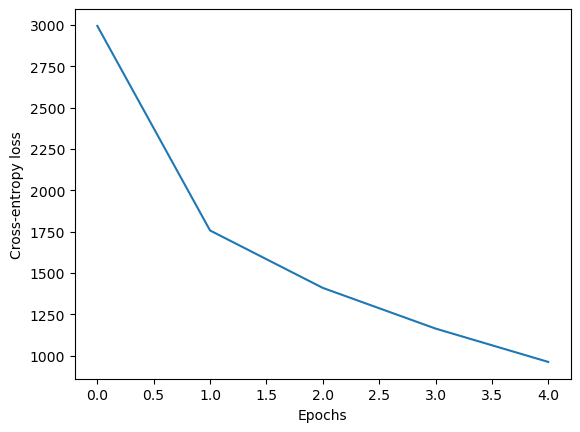

In [ ]:
# plot the loss per epoch curve
fig = plt.figure()
plt.plot(epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy loss')
plt.show()

In [ ]:
# Function to get all predictions at once
def get_all_preds(model, loader):
    all_preds = torch.tensor([]).to(device)
    for batch in loader:
        # get the samples images and their labels for the batk
        images, labels = batch

        # move to selected device (gpu or cpu)
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
    return all_preds

In [ ]:
# Analytics
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)

# turn off gradient for forward evaluation
with torch.no_grad():
    train_preds = get_all_preds(network, prediction_loader)
    preds_correct = train_preds.argmax(dim=1).eq(train_set.targets.to(device)).sum().item()

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 57443
accuracy: 0.9573833333333334


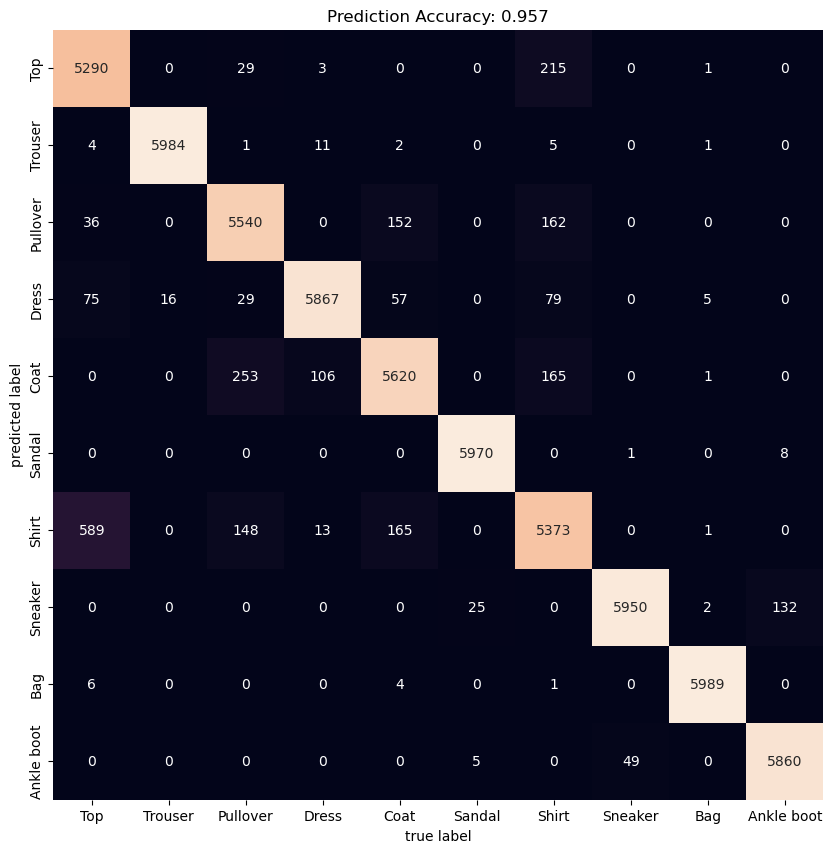

In [ ]:
# move data to cpu for using scikit 
targets_cpu = train_set.targets.cpu()
preds_cpu = train_preds.cpu()

# compute the confusion matrix
cm = confusion_matrix(targets_cpu, preds_cpu.argmax(dim=1))
labels_names = ('Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

# plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(targets_cpu, preds_cpu.argmax(dim=1)));